Data Analysis Plan
---
Goal: Test multiple models on the relationship between IGT scores & ventral striatal sensitivity between DRD2 carrier groups

- Grab variables of interest
    - P = D.P_payoff
    - Q = D.Q_sensitivity 
    - VS = D.Cards_RNR_VS_mean 
    - AGE = D.AGE
    - SEX = D.female_1
    <br><br>
- Filter to only get subjects who have data for P and VS, and who are white <br><br>
    good=find(~isnan(VS) & ~isnan(P) & D.white(1)<br>
    good_subs = zeros(size(AGE))<br>
    good_subs(good) = 1<br>
    N = length(D.AGE(good))<br>
    <br>
- Separate by DRD2 polymorphism<br><br>
    1 = Del. carrier (low D2) <br>
    0 = Ins/Ins (normal D2) <br>
    drd2_high = find(good_subs & D.DRD2_score==1) <br>
    drd2_low = find(good_subs & D.DRD2_score==0) <br>
    <br>
---

Analysis pipeline:

1. Demographic summary of groups:
    - Age
    - Sex
    - N (number in each group)
<br><br>
2. Group (DRD2 group) differences in:
    - VS
    - P
    - Q
    
         a.) visualize in graph <br>
         b.) analyze with t-test
<br><br>
3. Separate P vs. VS regressions for each group
    - Control for: Age & sex?


Dependencies

In [7]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import ptitprince as pt

from statsmodels.compat import unicode
import statsmodels.api as sm

#import plotly.plotly as py
#import plotly.express as px

pd.set_option('display.max_columns', 8)

Demographic summary

In [8]:
data = pd.read_csv('DRD2_subset_data.csv', delimiter=',')
data = data.dropna(subset=['P','Q','VS','DRD2', 'AGE', 'female_1'])

# Age

AGE Summary: count    438.000000
mean      42.666667
std        7.370442
min       30.000000
25%       36.000000
50%       43.500000
75%       49.000000
max       54.000000
Name: AGE, dtype: float64


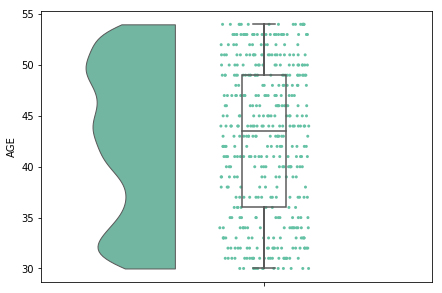

In [9]:
age_summary = data.AGE.describe()
print('AGE Summary:', age_summary)
#AGE_violin = sb.violinplot(y='AGE', data=data, palette='Blues')
AGE_raincloud = pt.RainCloud(y='AGE', data=data, width_viol=.4, width_box=.1, figsize=(7,5))

# Sex

Sex Summary: count    438.000000
mean       0.520548
std        0.500149
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: female_1, dtype: float64


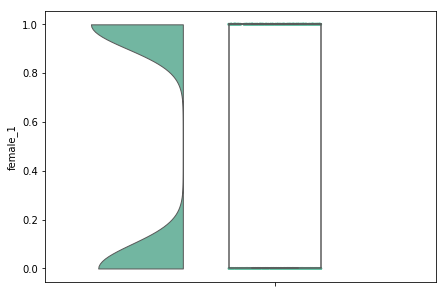

In [10]:
sex_summary = data.female_1.describe()
print('Sex Summary:', sex_summary)
#SEX_violin = sb.violinplot(y='female_1', data=data, palette='Blues')
SEX_raincloud = pt.RainCloud(y='female_1', data=data, width_viol=.4, width_box=.2, figsize=(7,5))

# IGT Scores

IGT Measures Summary 

 P 
 count    438.000000
mean      16.369863
std       29.908177
min      -92.000000
25%       -4.000000
50%       14.000000
75%       40.000000
max       96.000000
Name: P, dtype: float64 

 Q 
 count    438.000000
mean      31.616438
std       25.414800
min      -46.000000
25%       16.000000
50%       38.000000
75%       48.000000
max       86.000000
Name: Q, dtype: float64


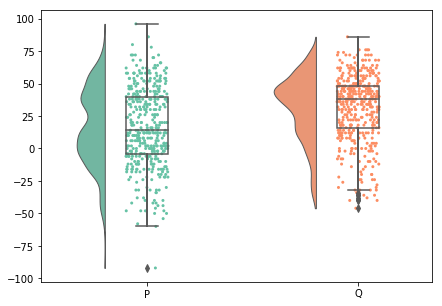

In [11]:
P_summary = data.P.describe()
Q_summary = data.Q.describe()
print('IGT Measures Summary','\n\n','P','\n', P_summary, '\n\n','Q','\n', Q_summary)
#IGT_violin = sb.violinplot(data=data.iloc[:,2:4], palette='Blues')
IGT_raincloud = pt.RainCloud(data=data.iloc[:,2:4], width_viol=.4, width_box=.2, figsize=(7,5))


# VS 

VS Summary 

 count    438.000000
mean       0.107567
std        0.166886
min       -0.543820
25%        0.008345
50%        0.099525
75%        0.204464
max        0.851100
Name: VS, dtype: float64


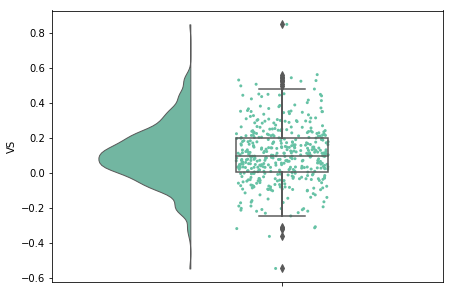

In [12]:
VS_summary = data.VS.describe()
#Ob_summary = data.Obesity.describe()
print('VS Summary', '\n\n', VS_summary)
#print('Obesity Summary', '\n\n', Ob_summary)
#VS_Ob_violin = sb.violinplot(y='VS', data=data, palette='Blues')
VS_raincloud = pt.RainCloud(y='VS', data=data, width_viol=.4, width_box=.2, figsize=(7,5))

# DRD2

DRD2 Carrier Summary: count    438.000000
mean       0.271689
std        0.445339
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: DRD2, dtype: float64


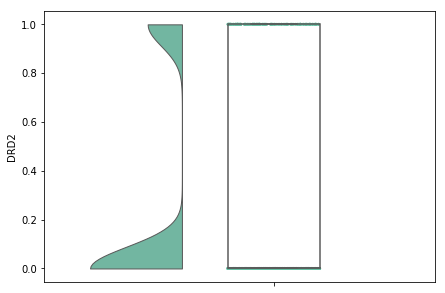

In [13]:
DRD2_summary = data.DRD2.describe()
print('DRD2 Carrier Summary:', DRD2_summary)
#DRD2_violin = sb.violinplot(y='DRD2', data=data, palette='Blues')
DRD2_raincloud = pt.RainCloud(y='DRD2', data=data, width_viol=.4, width_box=.2, figsize=(7,5))

If DRD2 == 1, subjects are DRD2 deletion carriers --> low D2 receptors --> Abnormal

If DRD2 == 0, subjects are DRD2 insertion carriers --> normal D2 receptors --> Control

In [14]:
abnormal = data[data['DRD2'] == 1] #"High DA"
control = data[data['DRD2'] == 0] #"Low DA"

# T-test
Standard Independent 2 sample test that assumes equal population variance

In [15]:
t_test_results = stats.ttest_ind(abnormal.iloc[:,2:5], control.iloc[:,2:5], equal_var=True)
t_test_results

# P, Q, VS

Ttest_indResult(statistic=array([-3.23083657,  0.53904942, -1.77172964]), pvalue=array([ 0.00132777,  0.59012789,  0.07713785]))

Welch's Test which does not assume equal population variance

In [16]:
stats.ttest_ind(abnormal.iloc[:,2:5], control.iloc[:,2:5], equal_var=False)

# P, Q, VS

Ttest_indResult(statistic=array([-3.2966212 ,  0.56431476, -1.7465982 ]), pvalue=array([ 0.00114068,  0.57308456,  0.08219884]))

### Scatter Plot for T-tests

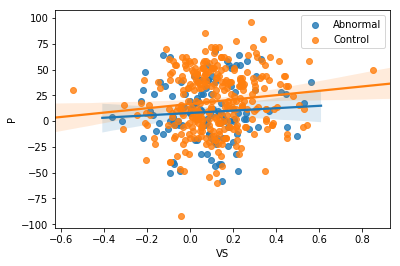

In [17]:
scatter_P_abnormal = sb.regplot(x='VS', y='P', data=abnormal, label='Abnormal').legend()
scatter_P_control = sb.regplot(x='VS', y='P', data=control, label='Control').legend()

In [18]:
#scatter_AGE_abnormal = sb.regplot(x='AGE', y='P', data=abnormal, label='Abnormal').legend()
#scatter_AGE_abnormal = sb.regplot(x='AGE', y='P', data=control, label='Control').legend()

In [19]:
#scatter_Female_abnormal = sb.regplot(x='female_1', y='P', data=abnormal, label='Abnormal').legend()
#scatter_Female_abnormal = sb.regplot(x='female_1', y='P', data=control, label='Control').legend()

# Histograms

### P Score between abnormal and control DRD2 groups

P Score T-test between abnormal and control DRD2 groups


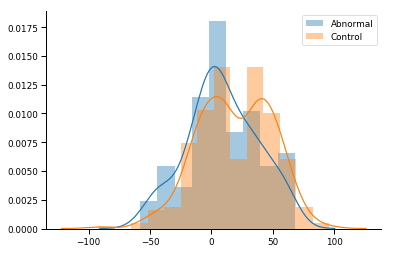

In [20]:
sb.set_context("paper")

abnormal_P_data = pd.concat([abnormal['P']], axis=1)
control_P_data = pd.concat([control['P']], axis=1)


print("P Score T-test between abnormal and control DRD2 groups")
hist_P_abnormal = sb.distplot(abnormal_P_data, label='Abnormal')
hist_P_control = sb.distplot(control_P_data, label='Control')

plt.legend();

sb.despine()

### Q Score T-test between abnormal and control DRD2 groups

Q Score T-test between high and low DA groups


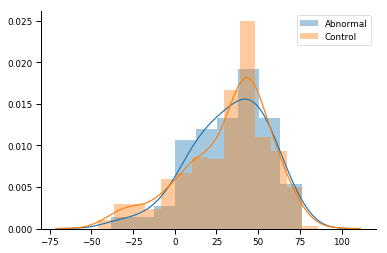

In [21]:
sb.set_context("paper")

abnormal_Q_data = pd.concat([abnormal['Q']], axis=1)
control_Q_data = pd.concat([control['Q']], axis=1)


print("Q Score T-test between high and low DA groups")
hist_Q_abnormal = sb.distplot(abnormal_Q_data, label='Abnormal')
hist_Q_control = sb.distplot(control_Q_data, label='Control')



plt.legend();


sb.despine()

### VS between abnormal and control DRD2 groups

VS T-test between abnormal and control DRD2 groups


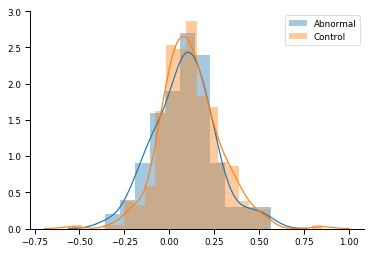

In [22]:
sb.set_context("paper")

abnormal_VS_data = pd.concat([abnormal['VS']], axis=1)
control_VS_data = pd.concat([control['VS']], axis=1)


print("VS T-test between abnormal and control DRD2 groups")
scatter_VS_abnormal = sb.distplot(abnormal_VS_data, label='Abnormal')
scatter_VS_control = sb.distplot(control_VS_data, label='Control')
plt.legend();


sb.despine()

# Linear Regressions

### High DA: P vs VS

with Interaction terms

In [98]:
target = pd.DataFrame(abnormal.P, columns=['P'])
x = pd.DataFrame(abnormal, columns=['VS', 'AGE', 'female_1'])
y = target['P']

interaction = PolynomialFeatures(include_bias=False, interaction_only=True)
x_inter = interaction.fit_transform(x)

lm_abnormal_int = linear_model.LinearRegression()
model = lm_abnormal_int.fit(x_inter,y)

abnormal_predictions = lm.predict(x_inter)

#print('Y = AX1 + BX2 + CX3 + DX1*X2 + EX2*X3 + FX3*X1')
#print('\nX1 = VS \nX2 = AGE \nX3 = Female \n')
#print('score:', lm.score(x_inter,y))
#print(lm_abnormal_int.coef_)
#print('intercept:', lm_abnormal_int.intercept_)


without

In [99]:
target = pd.DataFrame(abnormal.P, columns=['P'])
x = pd.DataFrame(abnormal, columns=['VS'])
y = target['P']

interaction = PolynomialFeatures(include_bias=False, interaction_only=True)
x_inter = interaction.fit_transform(x)

lm_abnormal_simple = linear_model.LinearRegression()
model = lm_abnormal_simple.fit(x_inter,y)

abnormal_predictions = lm_abnormal_simple.predict(x_inter)

#print('Y = AX1 + BX2 + CX3 + DX1*X2 + EX2*X3 + FX3*X1')
#print('\nX1 = VS \nX2 = AGE \nX3 = Female \n')
#print('score:', lm_abnormal_simple.score(x_inter,y))
#print(lm_abnormal_simple.coef_)
#print('intercept:', lm_abnormal_simple.intercept_)

In [111]:
columns = ['VS', 'Age', 'Female', 'VS*Age', 'Age*Female', 'Female*VS', 'Intercept']

coef_abnormal_with = lm_abnormal_int.coef_.tolist() + [float(lm_abnormal_int.intercept_)]
coef_abnormal_without = lm_abnormal_simple.coef_.tolist() + ['','', '', '', ''] + [float(lm_abnormal_simple.intercept_)]

pd.DataFrame({'with Controls': coef_abnormal_with, 'without': coef_abnormal_without}, columns)

,with Controls,without
VS,23.113944,11.5671
Age,-0.465335,
Female,-27.322599,
VS*Age,-0.631268,
Age*Female,39.372389,
Female*VS,0.304992,
Intercept,34.590608,7.91343


In [24]:
results = sm.OLS(y,x).fit()

print("DRD2 == 1")
print(results.summary())

DRD2==1
                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.089
Method:                 Least Squares   F-statistic:                              4.886
Date:                Mon, 21 Oct 2019   Prob (F-statistic):                     0.00310
Time:                        11:48:42   Log-Likelihood:                         -566.03
No. Observations:                 119   AIC:                                      1138.
Df Residuals:                     116   BIC:                                      1146.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### Control: P vs VS

with interactions

In [105]:
target = pd.DataFrame(control.P, columns=['P'])
x = pd.DataFrame(control, columns=['VS', 'AGE', 'female_1'])
y = target['P']

interaction = PolynomialFeatures(include_bias=False, interaction_only=True)
x_inter = interaction.fit_transform(x)

lm_control_int = linear_model.LinearRegression()
model = lm_control_int.fit(x_inter,y)

control_predictions = lm_control_int.predict(x_inter)


#print('Y = AX1 + BX2 + CX3 + DX1*X2 + EX2*X3 + FX3*X1')
#print('\nX1 = VS \nX2 = AGE \nX3 = Female \n')
#print('score:', lm_control_int.score(x_inter,y))
#print(lm_control_int.coef_)
#print('intercept:', lm_control_int.intercept_)

without interactions

In [106]:
target = pd.DataFrame(control.P, columns=['P'])
x = pd.DataFrame(control, columns=['VS'])
y = target['P']

interaction = PolynomialFeatures(include_bias=False, interaction_only=True)
x_inter = interaction.fit_transform(x)

lm_control_simple = linear_model.LinearRegression()
model = lm_control_simple.fit(x_inter,y)

abnormal_predictions = lm_control_simple.predict(x_inter)

#print('Y = AX1 + BX2 + CX3 + DX1*X2 + EX2*X3 + FX3*X1')
#print('\nX1 = VS \nX2 = AGE \nX3 = Female \n')
#print('score:', lm_control_simple.score(x_inter,y))
#print(lm_control_simple.coef_)
#print('intercept:', lm_control_simple.intercept_)

In [110]:
columns = ['VS', 'Age', 'Female', 'VS*Age', 'Age*Female', 'Female*VS', 'Intercept']

coef_control_with = lm_control_int.coef_.tolist() + [float(lm_control_int.intercept_)]
coef_control_without = lm_control_simple.coef_.tolist() + ['','', '', '', ''] + [float(lm_control_simple.intercept_)]

pd.DataFrame({'with Controls': coef_control_with, 'without': coef_control_without}, columns)

,with Controls,without
VS,-66.663372,21.14
Age,-0.186311,
Female,4.384223,
VS*Age,1.489284,
Age*Female,39.286248,
Female*VS,-0.419424,
Intercept,32.401416,16.7039


In [109]:
x = pd.DataFrame(control, columns=['VS', 'AGE', 'female_1'])
y = target['P']
results = sm.OLS(y,x).fit()
results.params
print("DRD2==0")
print(results.summary())

DRD2==0
                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.298
Model:                            OLS   Adj. R-squared (uncentered):              0.291
Method:                 Least Squares   F-statistic:                              44.66
Date:                Mon, 21 Oct 2019   Prob (F-statistic):                    4.35e-24
Time:                        13:44:35   Log-Likelihood:                         -1535.0
No. Observations:                 319   AIC:                                      3076.
Df Residuals:                     316   BIC:                                      3087.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------